<a href="https://colab.research.google.com/github/JCbarajas5/Machine-Learning-Anahuac/blob/main/Actividad_clase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

In [15]:
data = pd.read_excel('/content/Bank.xlsx')
display(data.head())

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign,subscribed
0,58,1,3,2143,1,0,5,5,261,1,0
1,44,2,2,29,1,0,5,5,151,1,0
2,33,1,2,2,1,1,5,5,76,1,0
3,47,1,4,1506,1,0,5,5,92,1,0
4,33,2,4,1,0,0,5,5,198,1,0


In [16]:
display(data.describe())

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign,subscribed
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1.513238,2.224813,1362.272058,0.555838,0.160226,15.806419,6.144655,258.163080,2.763841,0.116985
std,10.618762,0.692948,0.747997,3044.765829,0.496878,0.366820,8.322476,2.408034,257.527812,3.098021,0.321406
min,18.000000,1.000000,1.000000,-8019.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,33.000000,1.000000,2.000000,72.000000,0.000000,0.000000,8.000000,5.000000,103.000000,1.000000,0.000000
50%,39.000000,1.000000,2.000000,448.000000,1.000000,0.000000,16.000000,6.000000,180.000000,2.000000,0.000000
75%,48.000000,2.000000,3.000000,1428.000000,1.000000,0.000000,21.000000,8.000000,319.000000,3.000000,0.000000
max,95.000000,3.000000,4.000000,102127.000000,1.000000,1.000000,31.000000,12.000000,4918.000000,63.000000,1.000000


In [17]:
display(data.shape)

(45211, 11)

In [18]:
display(data.columns)

Index(['age', 'marital', 'education', 'balance', 'housing', 'loan', 'day',
       'month', 'duration_calls', 'campaign', 'subscribed'],
      dtype='object')

In [19]:
Y=data.iloc[:, 10:11]
display(Y.head())

,subscribed
0,0
1,0
2,0
3,0
4,0


In [20]:
X=data.iloc[:,0:10]
X.head()

,age,marital,education,balance,housing,loan,day,month,duration_calls,campaign
0,58,1,3,2143,1,0,5,5,261,1
1,44,2,2,29,1,0,5,5,151,1
2,33,1,2,2,1,1,5,5,76,1
3,47,1,4,1506,1,0,5,5,92,1
4,33,2,4,1,0,0,5,5,198,1


In [21]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2)

In [22]:
tree=DecisionTreeClassifier(max_depth=3)

In [23]:
tree.fit(X_train.values, Y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
tree_score=tree.score(X_test.values, Y_test)
print("Accuracy:", tree_score)

Accuracy: 0.8903018909653876


In [25]:
Y_pred = tree.predict(X_test.values)

In [26]:
precision = precision_score(Y_test, Y_pred, pos_label=1)
recall = recall_score(Y_test, Y_pred, pos_label=1)
print("Precision:", round(precision,2))
print("Recall:", round(recall))

Precision: 0.6
Recall: 0


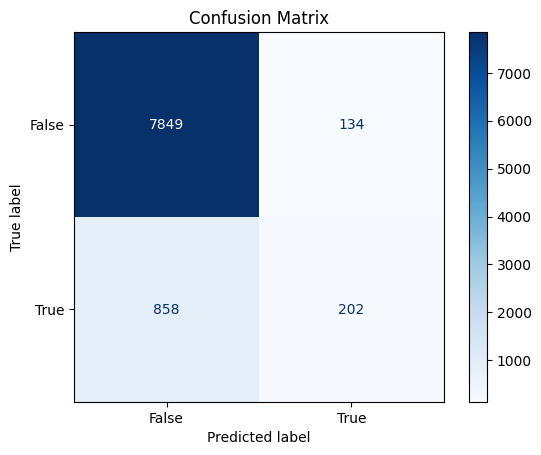

In [27]:
cm = confusion_matrix(Y_test, Y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["False", "True"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

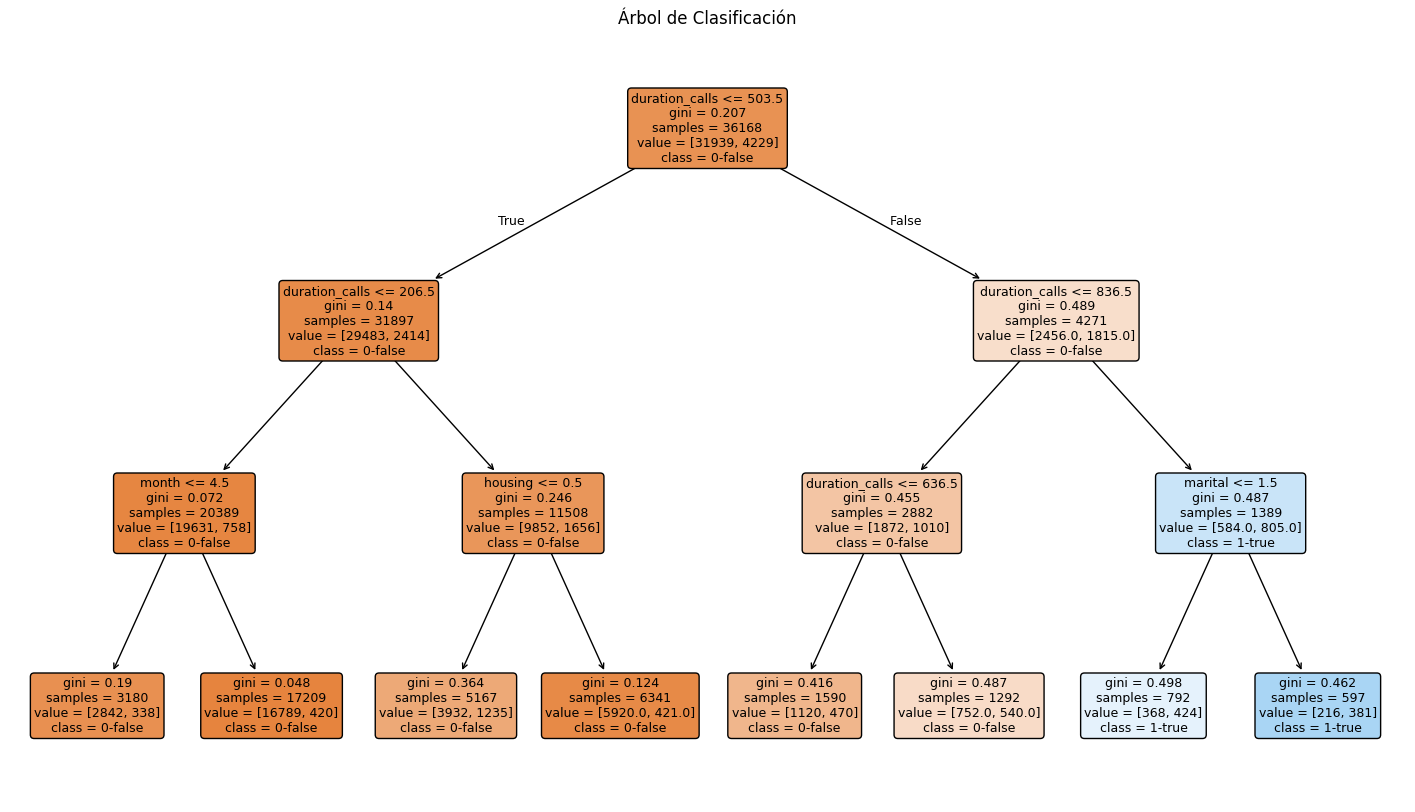

In [28]:
plt.figure(figsize=(18, 10))
plot_tree(
tree,
feature_names=X.columns,
class_names=["0-false", "1-true"],
filled=True,
rounded=True,
fontsize=9
)
plt.title("Árbol de Clasificación")
plt.show()

In [29]:
importances = pd.Series(tree.feature_importances_, index=X.columns).sort_values(ascending=False)
importances

,0
duration_calls,0.850007
housing,0.119559
month,0.025361
marital,0.005073
age,0.000000
education,0.000000
loan,0.000000
balance,0.000000
day,0.000000
campaign,0.000000


In [30]:
age=28
marital=1
education=3
balance=2000
housing=1
loan=1
day=2
month=10
duration_calls=1000
campaign=1
new_person=[age,marital,education,balance,housing,loan,day,month,duration_calls,campaign]
pred=tree.predict([new_person])
print("Al cliente se le asigna la clase: ",pred)

Al cliente se le asigna la clase:  [1]


In [32]:
age=28
marital=1
education=3
balance=2000
housing=1
loan=1
day=2
month=10
duration_calls=400
campaign=1
new_person=[age,marital,education,balance,housing,loan,day,month,duration_calls,campaign]
pred=tree.predict([new_person])
print("Al cliente se le asigna la clase: ",pred)

Al cliente se le asigna la clase:  [0]
